In [7]:
import pandas as pd

In [8]:
# Indlæs data og bestem antallet af rækker og kolonner.
df = pd.read_csv('ML_apple_quality.csv')
df.shape

(4001, 9)

In [9]:
# Bestem datatyperne for de enkelte kolonner.
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [10]:
# Vis de første rækker i datasættet.
df.head(3)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad


In [11]:
# Vis de sidste rækker i datasættet.
df.tail(3)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [12]:
# Fjern den sidste række i datasættet, som åbenlyst ikke hører hjemme der.
# Vi kender index, som er 4000
df = df.drop(4000)
df.tail(3)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [13]:
# Undersøg, om der mangler værdier andre steder
df.isna().sum()

A_id           0
Size           1
Weight         0
Sweetness      1
Crunchiness    0
Juiciness      1
Ripeness       1
Acidity        0
Quality        0
dtype: int64

In [14]:
# Vi ser, at der er fire manglende værdier.
# Vi vælger den mulighed, som er at fjerne alle de rækker, hvor der er manglende værdier, fra datasættet.
df = df.dropna()

In [15]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [16]:
df.shape

(3996, 9)

In [17]:
# Vi undersøger kolonnen 'Acidity' nærmere, da den har datatypen 'object'. Burde den være en 'float64' som de andre?
# Vi prøver at konvertere den til 'float64' og ser, om vi får en fejl.
df['Acidity'] = df['Acidity'].apply(lambda x: pd.to_numeric(x))

In [18]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [19]:
# Kolonnen 'Quality' burde måske være en 'category' datatype, da den angiver om æblerne er gode eller dårlige (enten eller).
df['Quality'] = df['Quality'].astype('category')

In [20]:
df.dtypes

A_id            float64
Size            float64
Weight          float64
Sweetness       float64
Crunchiness     float64
Juiciness       float64
Ripeness        float64
Acidity         float64
Quality        category
dtype: object

In [26]:
# Kolonnen 'A_id' burde egentlig være et index med hele tal. Det er bare fortløbende nummerering af stikprøvens æbler.
df['A_id'] = df['A_id'].astype('int') # Konverterer datatypen fra 'float64' til 'int64'
df.set_index(df['A_id']) # Angiver kolonnen 'A_id' som index
df.drop(columns=['A_id']) # Fjerner kolonnen 'A_id', da den nu er gemt i indekset

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255,good
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [34]:
# Vi kan lave simpel statistisk analyse på de forskellige kolonner
# mindsteværdi, størsteværdi, middelværdi, standardafvigelse/spredning, median
# Vi tager 'Size' som et eksempel
import numpy as np
apple_sizes = df['Size']
print('Mindsteværdien er {}'.format(np.min(apple_sizes)))
print('Størsteværdien er {}'.format(np.max(apple_sizes)))
print('Middelværdien er {}'.format(np.mean(apple_sizes)))
print('Medianen er {}'.format(np.median(apple_sizes)))
print('Standardafvigelsen er {}'.format(np.std(apple_sizes)))

Mindsteværdien er -7.151703059
Størsteværdien er 6.406366899
Middelværdien er -0.5016601963198198
Medianen er -0.512366463
Standardafvigelsen er 1.9276978909251181


In [35]:
# Hvad mon negative værdier af størrelsen betyder?
# Der er sket en transformation af data på en eller anden måde.
# Man må antage, at ordningen er bevaret.

{'whiskers': [<matplotlib.lines.Line2D at 0x24f99b68050>,
 'caps': [<matplotlib.lines.Line2D at 0x24f99b686b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f99b37da0>],
 'medians': [<matplotlib.lines.Line2D at 0x24f99b68c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f99b68f80>],
 'means': []}

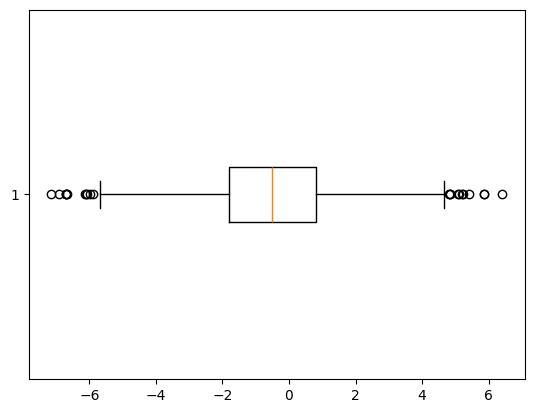

In [39]:
# Vi kan illustrere de simple deskriptorer i et boksplot.
import matplotlib.pyplot as plt
plt.boxplot(apple_sizes, vert=False)

(array([  1.,   8.,  29.,  93., 256., 504., 717., 789., 702., 504., 260.,
         98.,  27.,   7.,   1.]),
 array([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,
         5.,  6.,  7.]),
 <BarContainer object of 15 artists>)

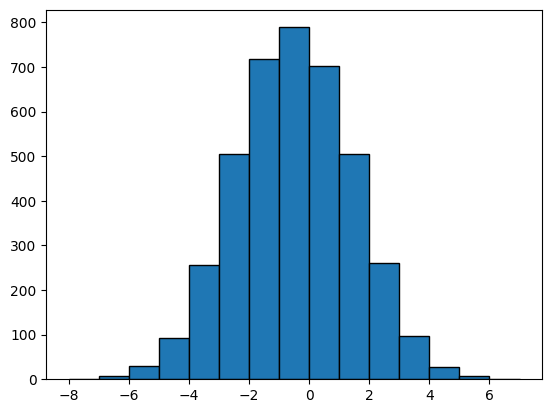

In [47]:
# Vi kan også lave et histogram på baggrund af selvvalgte intervalinddelinger (kaldet bins)
# Intervaller af længden 1 fra -8 til 7 anvendes
bins = [x for x in range(-8,8,1)]
plt.hist(apple_sizes, bins=bins, edgecolor='black')

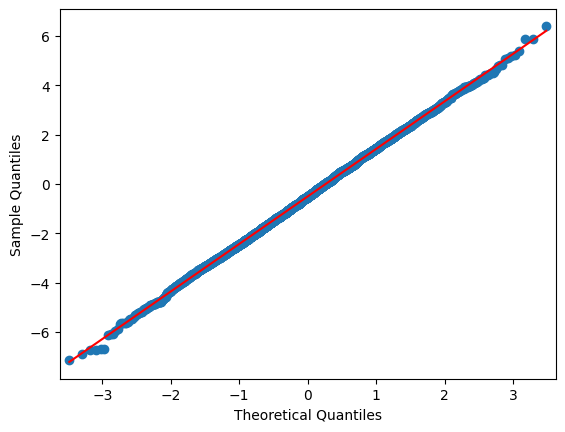

In [51]:
# Lidt avanceret: Vi kan undersøge, om størrelserne med god tilnærmelse er normalfordelte.
import statsmodels.api as sm
fig = sm.qqplot(apple_sizes, line='s')
plt.show()

In [ ]:
# Da datakvantilerne med god tilnærmelse ligger på den "teoretisk linje", ser det ud
# til, at data med god tilnærmelse er normalfordelte.